In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [63]:
!pip install forex-python

In [166]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [64]:
customer_data=pd.read_csv('Mall_Customers.csv')

In [65]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [66]:
 customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [67]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [70]:
from forex_python.converter import CurrencyRates
# i tried using this library but i guess its api link expired

In [73]:
import requests
api_key = 'f8e2fc5cc5b9ebc4513b54ff'
url = f"https://v6.exchangerate-api.com/v6/{api_key}/latest/USD"
response = requests.get(url)
data = response.json()
exchange_rate = data['conversion_rates']['INR']

In [76]:
print(exchange_rate)

83.5053


In [78]:
type(exchange_rate)

float

In [79]:
customer_data['Annual Income (k$)']=customer_data['Annual Income (k$)'].astype(float)

In [83]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      200 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [80]:
def convert_usd_to_inr(usd_amount):
    inr_amount = usd_amount * exchange_rate
    return inr_amount

In [86]:
customer_data['Annual Income (k$)']=customer_data['Annual Income (k$)'].apply(convert_usd_to_inr)

In [88]:
customer_data=customer_data.rename(columns={'Annual Income (k$)':'Annual Income (INR)'})

In [89]:
customer_data.describe()

,CustomerID,Age,Annual Income (INR),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,5057.080968,50.200000
std,57.879185,13.969007,2193.243420,25.823522
min,1.000000,18.000000,1252.579500,1.000000
25%,50.750000,28.750000,3465.469950,34.750000
50%,100.500000,36.000000,5135.575950,50.000000
75%,150.250000,49.000000,6513.413400,73.000000
max,200.000000,70.000000,11440.226100,99.000000


In [91]:
#Feature Analysis

In [92]:
# Understanding the 
def diagnostic_plots(df, variable):
    plt.figure(figsize = (16, 4))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins = 30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist = "norm", plot = plt)
    plt.ylabel('Variable quantiles')

    # Boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y = df[variable])
    plt.title('Boxplot')

    plt.show()

In [93]:
# First lets look at ategorical variable

In [94]:
gender_count=customer_data['Gender'].value_counts()
gender_count

Gender
Female    112
Male       88
Name: count, dtype: int64

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\categorical.py:533: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = data.get(y, y)


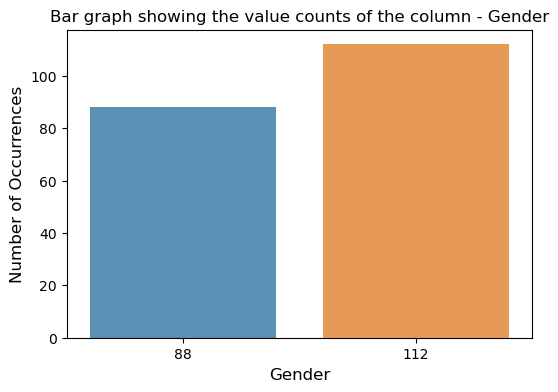

In [108]:
plt.figure(figsize=(6,4))
sns.barplot(x=gender_count.index,y=gender_count.values,data=gender_count,alpha=0.8)
plt.title('Bar graph showing the value counts of the column - Gender')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

In [96]:
### Mean of Annual Income by Gender

gender_income = customer_data[['Gender', 'Annual Income (INR)']].groupby('Gender', as_index = False).mean()
gender_income

,Gender,Annual Income (INR)
0,Female,4947.689025
1,Male,5196.307077


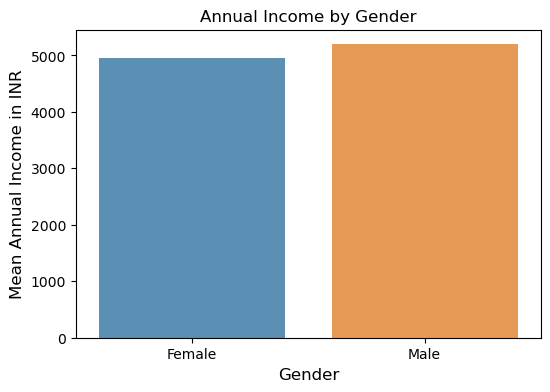

In [107]:
### Mean Annual Income by Gender
plt.figure(figsize=(6,4))
sns.barplot(x=gender_income['Gender'], y=gender_income['Annual Income (INR)'],data=gender_income, alpha = 0.8)
plt.title('Annual Income by Gender')
plt.ylabel('Mean Annual Income in INR', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

In [98]:
### Mean Spending Score by Gender

gender_score = customer_data[['Gender', 'Spending Score (1-100)']].groupby('Gender', as_index = False).mean()
gender_score

,Gender,Spending Score (1-100)
0,Female,51.526786
1,Male,48.511364


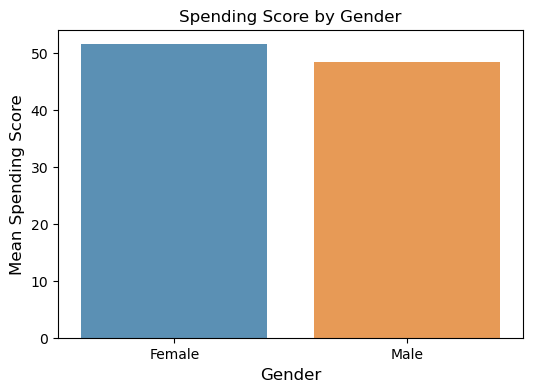

In [113]:
### Mean Spending Score by Gender
plt.figure(figsize=(6,4))
sns.barplot(x=gender_score['Gender'], y=gender_score['Spending Score (1-100)'],alpha = 0.8)
plt.title('Spending Score by Gender')
plt.ylabel('Mean Spending Score', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

In [111]:
### Mean Age by Gender

gender_age = customer_data[['Gender', 'Age']].groupby('Gender', as_index = False).mean()
gender_age

,Gender,Age
0,Female,38.098214
1,Male,39.806818


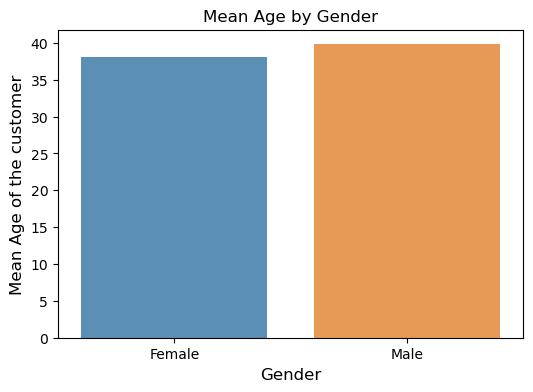

In [115]:
### Mean Age by Gender
plt.figure(figsize=(6,4))
sns.barplot(x=gender_age['Gender'], y=gender_age['Age'],alpha = 0.8)
plt.title('Mean Age by Gender')
plt.ylabel('Mean Age of the customer', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

In [117]:
# Lets move to analysing numerical variables

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


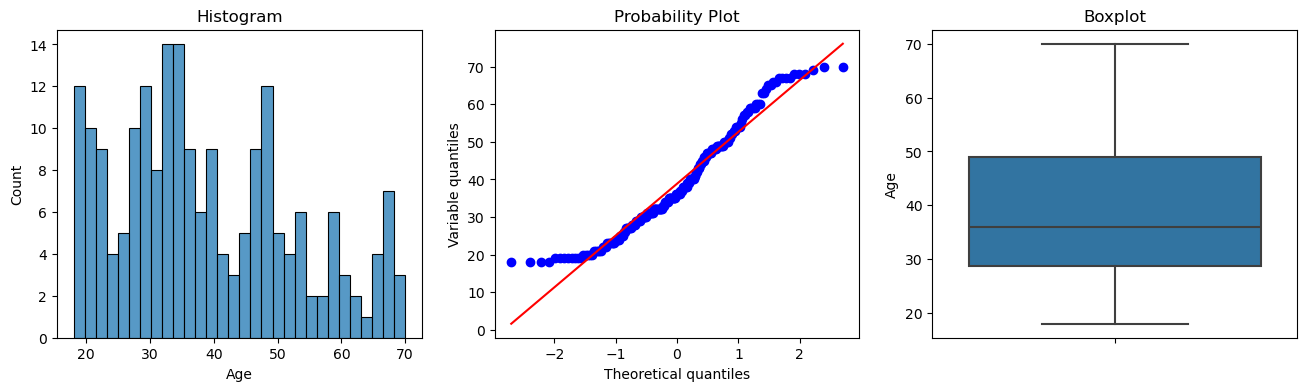

In [120]:
### Understanding the distribution of the column - Age

diagnostic_plots(customer_data, 'Age')

<Axes: xlabel='Age', ylabel='Annual Income (INR)'>

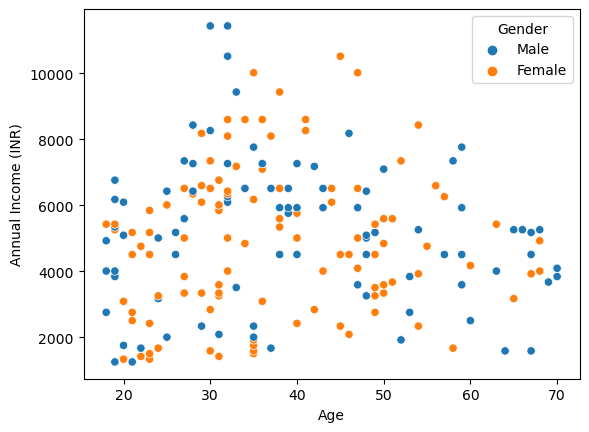

In [123]:
### Scatterplot between Age and Annual Income

sns.scatterplot(data = customer_data, x = "Age", y = "Annual Income (INR)", hue = "Gender")

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

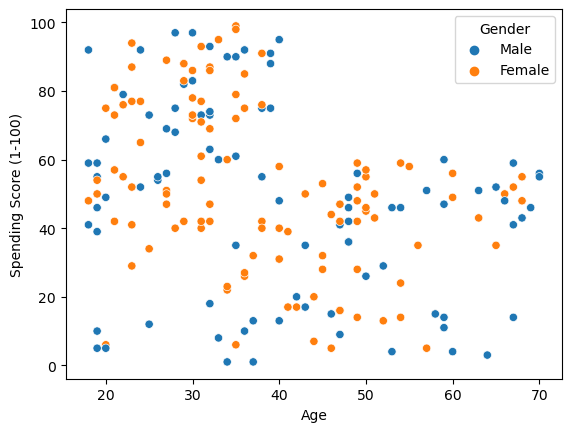

In [125]:
### Scatterplot between Age and Spending Score (1-100)

sns.scatterplot(data = customer_data, x = "Age", y = "Spending Score (1-100)", hue = "Gender")

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


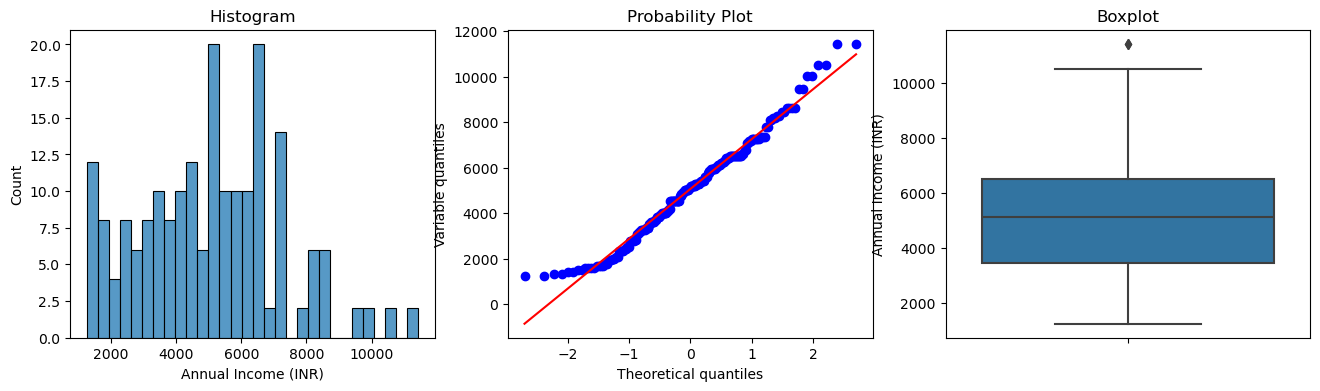

In [127]:
### Understanding the distribution of the column - Annual Income (k$)

diagnostic_plots(customer_data, 'Annual Income (INR)')

<Axes: xlabel='Annual Income (INR)', ylabel='Spending Score (1-100)'>

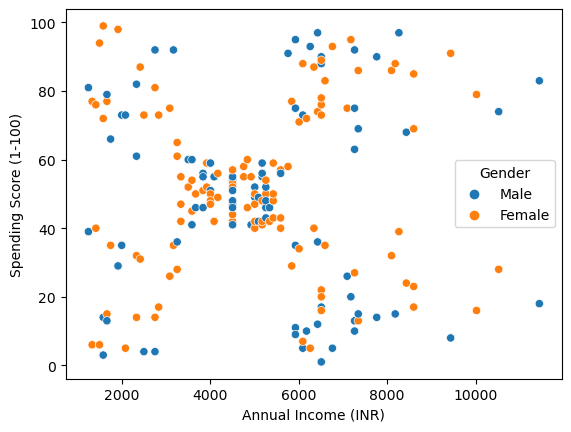

In [129]:
### Scatterplot between Annual Income and Spending Score

sns.scatterplot(data = customer_data, x = "Annual Income (INR)", y = "Spending Score (1-100)", hue = "Gender")

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


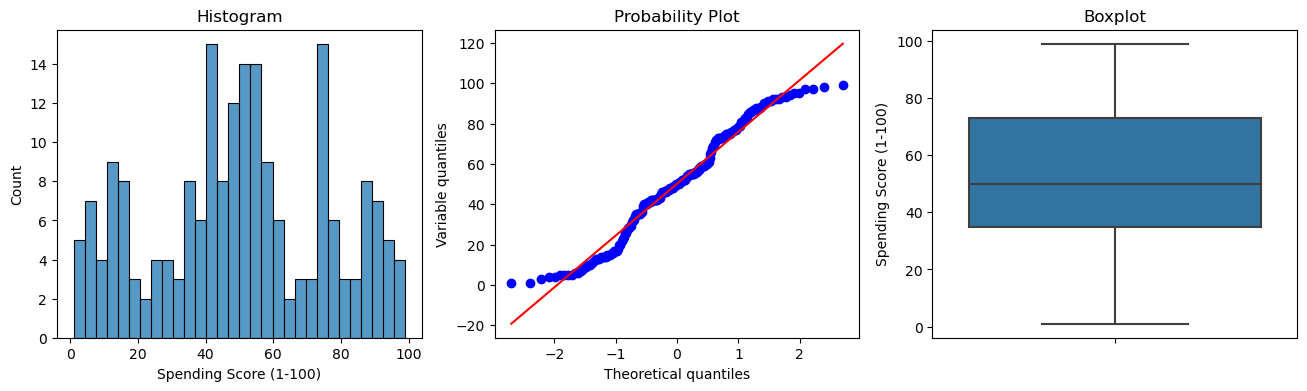

In [132]:
### Understanding the distribution of the column - Spending Score (1-100)

diagnostic_plots(customer_data, 'Spending Score (1-100)')

## Data Preprocessing

In [140]:
Q1=np.percentile(customer_data['Annual Income (INR)'],25)
Q3=np.percentile(customer_data['Annual Income (INR)'],75)
print('Q1:',Q1,'Q3:',Q3)
IQR=Q3-Q1
outlier_step=1.5*IQR

Q1: 3465.46995 Q3: 6513.4134


In [142]:
outlier_list_col = customer_data[(customer_data['Annual Income (INR)'] < Q1 - outlier_step) | (customer_data['Annual Income (INR)'] > Q3 + outlier_step)].index
outlier_list_col

Index([198, 199], dtype='int64')

In [150]:
customer_data['Annual Income (INR)'].iloc[198]=Q3 + outlier_step
customer_data['Annual Income (INR)'].iloc[199]=Q3 + outlier_step

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15636\1119241084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['Annual Income (INR)'].iloc[198]=Q3 + outlier_step
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15636\1119241084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['Annual Income (INR)'].iloc[199]=Q3 + outlier_step


In [152]:
customer_data['Annual Income (INR)']

0       1252.579500
1       1252.579500
2       1336.084800
3       1336.084800
4       1419.590100
           ...     
195    10020.636000
196    10521.667800
197    10521.667800
198    11085.328575
199    11085.328575
Name: Annual Income (INR), Length: 200, dtype: float64

In [155]:
### Dropping the columns - CustomerId from the dataset

customer_data.drop(['CustomerID'], axis = 1, inplace = True)
customer_data

,Gender,Age,Annual Income (INR),Spending Score (1-100)
0,Male,19,1252.579500,39
1,Male,21,1252.579500,81
2,Female,20,1336.084800,6
3,Female,23,1336.084800,77
4,Female,31,1419.590100,40
...,...,...,...,...
195,Female,35,10020.636000,79
196,Female,45,10521.667800,28
197,Male,32,10521.667800,74
198,Male,32,11085.328575,18


## Clustering

# Silhouette and Calinski-Harabasz Scores

Silhouette and Calinski-Harabasz scores are both metrics used to evaluate the quality of clustering in unsupervised learning. Here's a detailed explanation of each:

## Silhouette Score

The Silhouette Score is a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where:

- A value close to 1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- A value close to 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters.
- A value close to -1 indicates that the object might have been assigned to the wrong cluster.

The Silhouette Score for a single sample is calculated as:

$$  s = \frac{b - a}{\max(a, b)} $$

where:
- \( a \) is the mean distance between a sample and all other points in the same cluster.
- \( b \) is the mean distance between a sample and all other points in the next nearest cluster.

The overall Silhouette Score for a dataset is the mean Silhouette Score of all samples.

## Calinski-Harabasz Score

The Calinski-Harabasz Score, also known as the Variance Ratio Criterion, is another metric for evaluating the quality of clustering. It is defined as the ratio of the sum of between-cluster dispersion and of within-cluster dispersion for all clusters. Higher values indicate better-defined clusters.

The formula for the Calinski-Harabasz Score is:

$$ CH = \frac{\text{trace}(B_k) / (k - 1)}{\text{trace}(W_k) / (n - k)} $$

where:
- $ \text{trace}(B_k) $ is the between-cluster dispersion matrix trace.
- $ \text{trace}(W_k) $ is the within-cluster dispersion matrix trace.
- k is the number of clusters.
- n is the total number of samples.

In [161]:
### Filtering the age and spending score from the dataset

X=customer_data[['Age','Spending Score (1-100)']].iloc[:,:].values

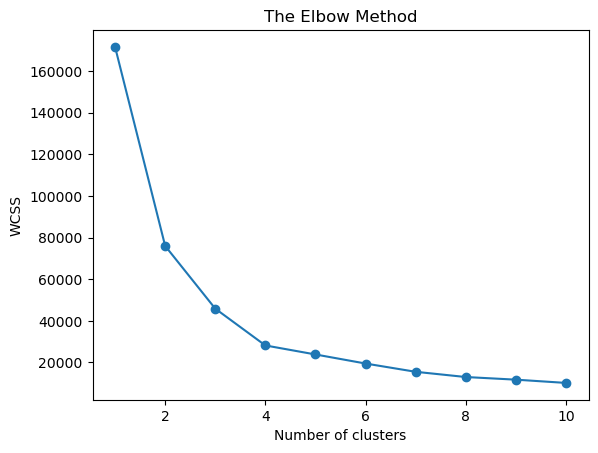

In [165]:
### Using elbow method to find the optimal number of clusters

wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i, init='k-means++' ,random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [167]:
### Training the K-Means model on the dataset

km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = km.fit_predict(X)

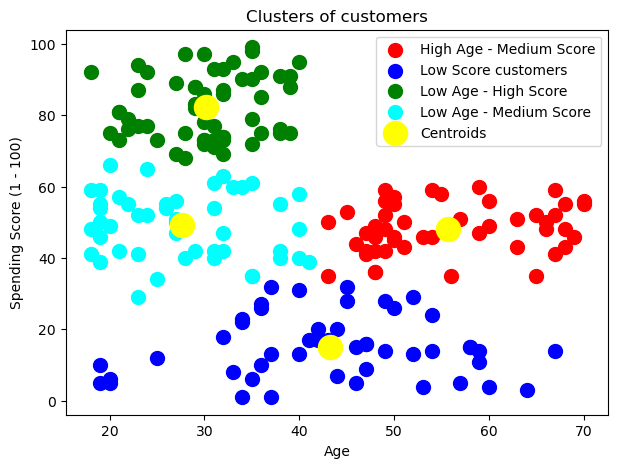

In [171]:
### Visualizing the clusters

plt.figure(figsize = (7, 5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'High Age - Medium Score')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Low Score customers')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Low Age - High Score')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Low Age - Medium Score')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()

In [176]:
### Calculating the performance of the clusters

from sklearn.metrics import silhouette_score, calinski_harabasz_score

silhouette_score_kmeans = round(silhouette_score(X, y_kmeans), 2)
calinski_harabasz_score_kmeans = round(calinski_harabasz_score(X, y_kmeans), 2)

print('Silhouette Score : {}'.format(silhouette_score_kmeans))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_kmeans))

Silhouette Score : 0.5
Calinski Harabasz Score : 332.56


In [179]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

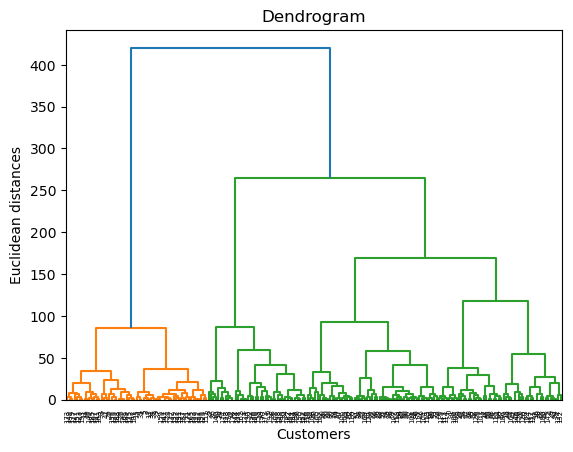

In [180]:
### Using the dendrogram to find the optimal number of clusters

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [181]:
### Training the Hierarchial clustering model on the dataset

hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

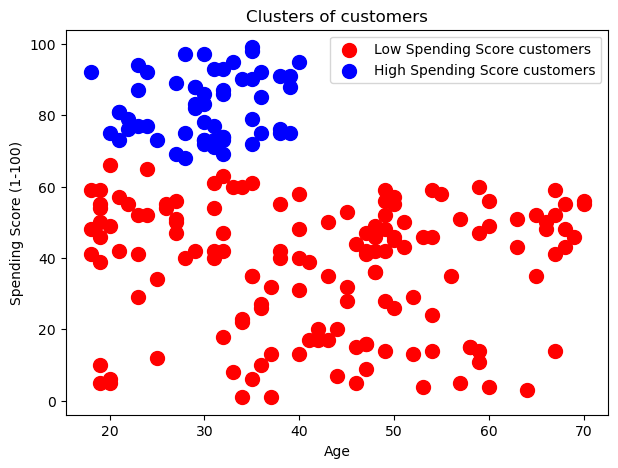

In [182]:
### Visualizing the clusters

plt.figure(figsize = (7, 5))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Low Spending Score customers')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'High Spending Score customers')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [183]:
### Calculating the performance of the clusters

silhouette_score_hc = round(silhouette_score(X, y_hc), 2)
calinski_harabasz_score_hc = round(calinski_harabasz_score(X, y_hc), 2)

print('Silhouette Score : {}'.format(silhouette_score_hc))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_hc))

Silhouette Score : 0.45
Calinski Harabasz Score : 210.56


In [185]:
!pip install tabulate

In [186]:
from tabulate import tabulate


In [187]:
### Tabulating the results

table = []
print('Segmentation using Age and Spending Score')
table.append(['S.No', 'Clustering Model', 'Silhouette Score', 'Calinski Harabasz Score'])
table.append([1, 'K - Means clustering', silhouette_score_kmeans, calinski_harabasz_score_kmeans])
table.append([2, 'Hierarchial clustering', silhouette_score_hc, calinski_harabasz_score_hc])
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

Segmentation using Age and Spending Score
╒════════╤════════════════════════╤════════════════════╤═══════════════════════════╕
│   S.No │ Clustering Model       │   Silhouette Score │   Calinski Harabasz Score │
╞════════╪════════════════════════╪════════════════════╪═══════════════════════════╡
│      1 │ K - Means clustering   │               0.5  │                    332.56 │
├────────┼────────────────────────┼────────────────────┼───────────────────────────┤
│      2 │ Hierarchial clustering │               0.45 │                    210.56 │
╘════════╧════════════════════════╧════════════════════╧═══════════════════════════╛


In [214]:
### Filtering the annual income and spending score from the dataset

X = customer_data[['Annual Income (INR)', 'Spending Score (1-100)']].iloc[:, :].values

In [215]:
from sklearn.preprocessing import StandardScaler
trans=StandardScaler()
X_scaled=trans.fit_transform(X)

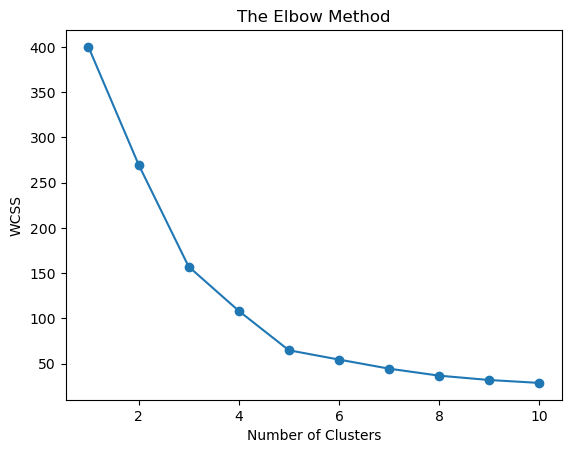

In [216]:
### Using the elbow method to find the optimal number of clusters

wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++')
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.plot(range(1,11),wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [223]:
### Training the K-Means model on the dataset

km = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = km.fit_predict(X_scaled)

cluster_centers_scaled = km.cluster_centers_
cluster_centers_original = trans.inverse_transform(cluster_centers_scaled)

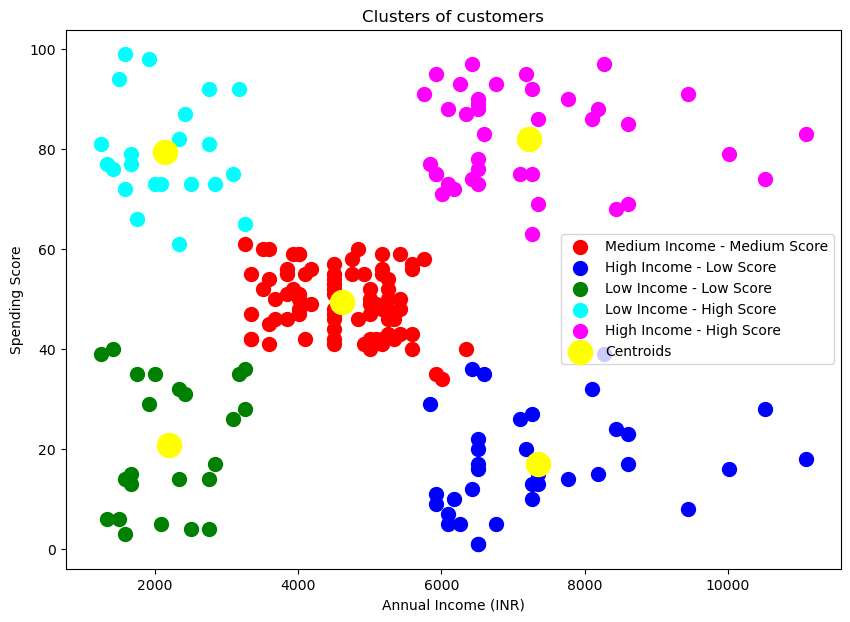

In [232]:
### Visualizing the clusters

plt.figure(figsize = (10, 7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Medium Income - Medium Score')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'High Income - Low Score')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Low Income - Low Score')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Low Income - High Score')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'High Income - High Score')
plt.scatter(cluster_centers_original[:, 0], cluster_centers_original[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (INR)')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [230]:
### Calculating the performance of the clusters

silhouette_score_kmeans = round(silhouette_score(X_scaled, y_kmeans), 2)
calinski_harabasz_score_kmeans = round(calinski_harabasz_score(X_scaled, y_kmeans), 2)

print('Silhouette Score : {}'.format(silhouette_score_kmeans))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_kmeans))

Silhouette Score : 0.56
Calinski Harabasz Score : 252.35


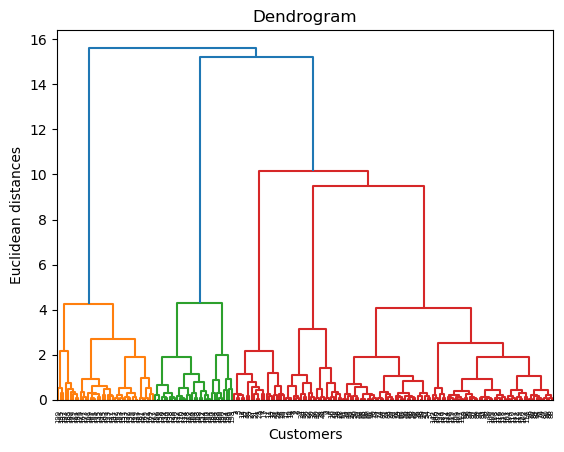

In [233]:
### Using the dendrogram to find the optimal number of clusters

dendrogram = sch.dendrogram(sch.linkage(X_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [234]:
### Training the Hierarchial clustering model on the dataset

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_scaled)

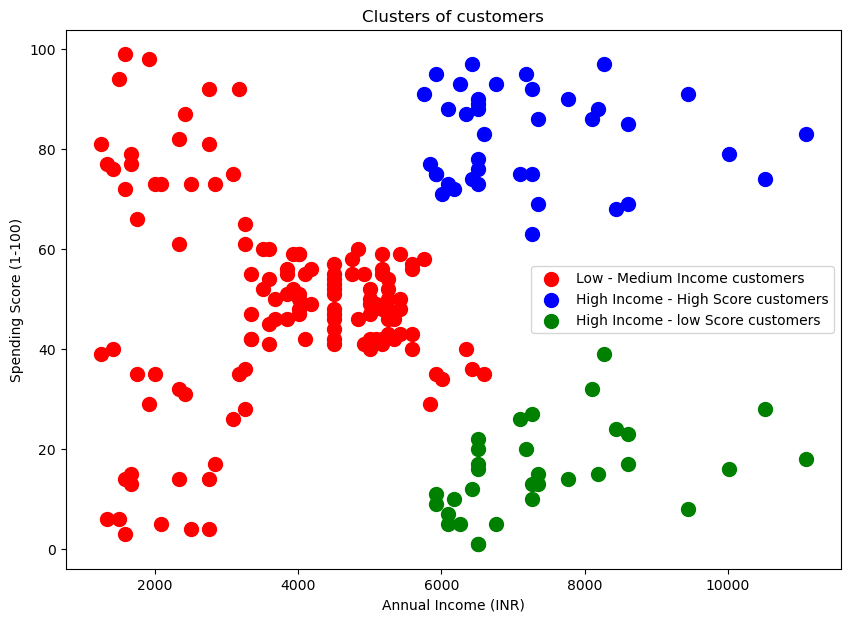

In [238]:
### Visualizing the clusters

plt.figure(figsize = (10, 7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Low - Medium Income customers')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'High Income - High Score customers')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'High Income - low Score customers')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (INR)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [240]:
### Calculating the performance of the clusters

silhouette_score_hc = round(silhouette_score(X_scaled, y_hc), 2)
calinski_harabasz_score_hc = round(calinski_harabasz_score(X_scaled, y_hc), 2)

print('Silhouette Score : {}'.format(silhouette_score_hc))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_hc))

Silhouette Score : 0.46
Calinski Harabasz Score : 144.42


In [241]:
### Tabulating the results

table = []
print('Segmentation using Annual Income and Spending Score')
table.append(['S.No', 'Clustering Model', 'Silhouette Score', 'Calinski Harabasz Score'])
table.append([1, 'K - Means clustering', silhouette_score_kmeans, calinski_harabasz_score_kmeans])
table.append([2, 'Hierarchial clustering', silhouette_score_hc, calinski_harabasz_score_hc])
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

Segmentation using Annual Income and Spending Score
╒════════╤════════════════════════╤════════════════════╤═══════════════════════════╕
│   S.No │ Clustering Model       │   Silhouette Score │   Calinski Harabasz Score │
╞════════╪════════════════════════╪════════════════════╪═══════════════════════════╡
│      1 │ K - Means clustering   │               0.56 │                    252.35 │
├────────┼────────────────────────┼────────────────────┼───────────────────────────┤
│      2 │ Hierarchial clustering │               0.46 │                    144.42 │
╘════════╧════════════════════════╧════════════════════╧═══════════════════════════╛


In [260]:
### Filtering the age, annual income and spending score from the dataset

X = customer_data[['Age', 'Annual Income (INR)', 'Spending Score (1-100)']].iloc[:, :].values

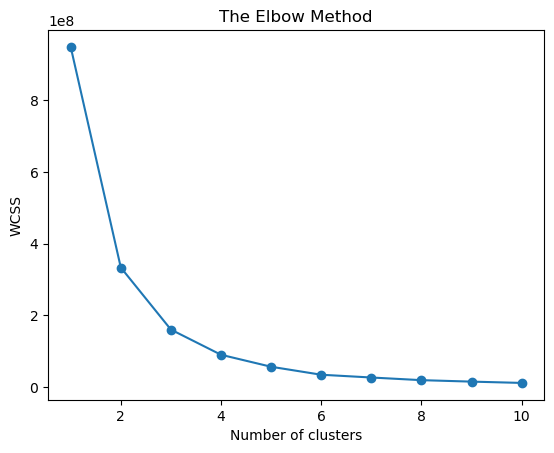

In [291]:
### Using the elbow method to find the optimal number of clusters

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [292]:
### Training the K-Means model on the dataset

km = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = km.fit_predict(X)

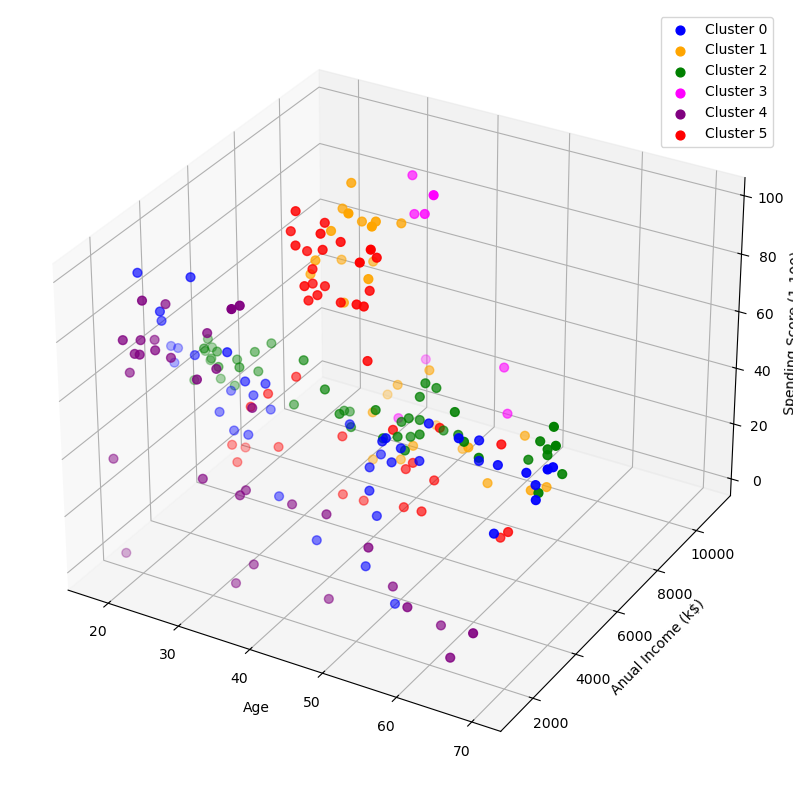

In [307]:
### Visualizing the clusters in 3d

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s = 40 , color = 'blue', label = "Cluster 0")
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s = 40 , color = 'orange', label = "Cluster 1")
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s = 40 , color = 'green', label = "Cluster 2")
ax.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], X[y_kmeans == 3, 2], s = 40 , color = 'magenta', label = "Cluster 3")
ax.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], X[y_kmeans == 4, 2], s = 40 , color = 'purple', label = "Cluster 4")
ax.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], X[y_kmeans == 5, 2], s = 40 , color = 'red', label = "Cluster 5")
ax.set_xlabel('Age')
ax.set_ylabel('Anual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.show()

In [294]:
### Visualizing the clusters using plotly
import plotly.graph_objects as go

data_dict = {i: X[y_kmeans == i] for i in range(km.n_clusters)}

traces = []
colors = ['blue', 'orange', 'green', 'magenta', 'purple', 'red']

for i in range(kmeans.n_clusters):
    traces.append(go.Scatter3d(
        x=data_dict[i][:, 0],
        y=data_dict[i][:, 1],
        z=data_dict[i][:, 2],
        mode='markers',
        marker=dict(size=3, color=colors[i]),
        name=f'Cluster {i}'
    ))

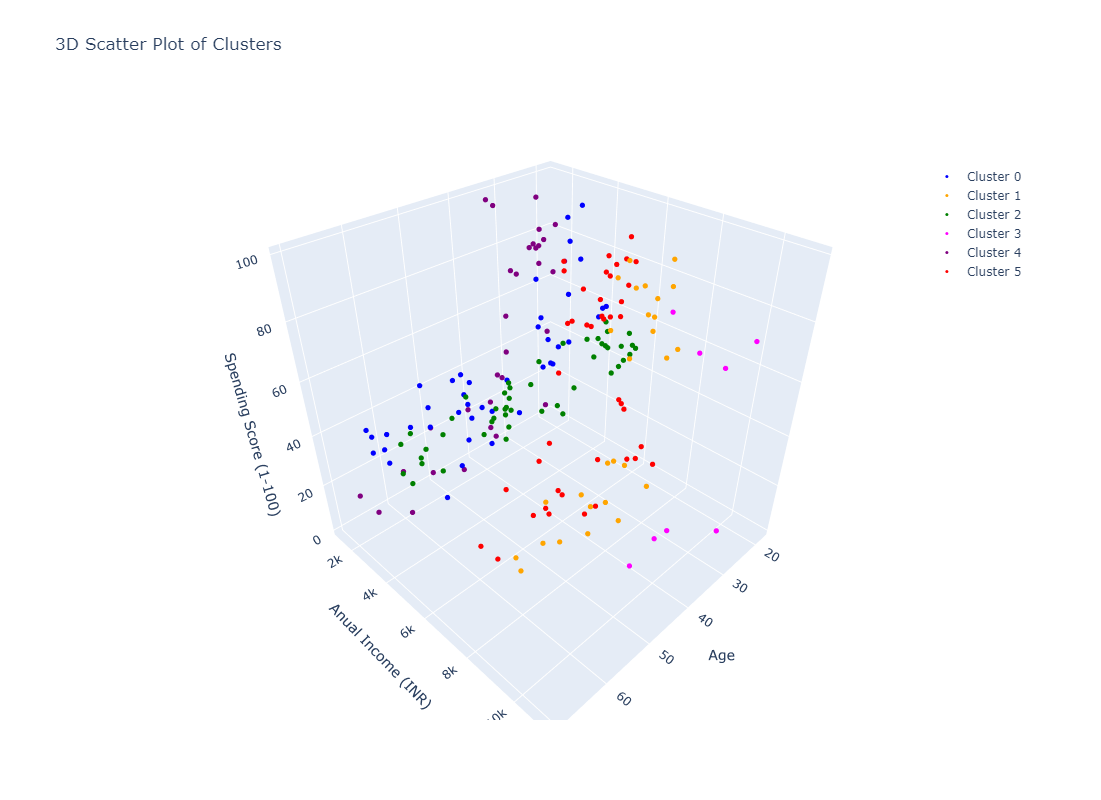

In [306]:
fig = go.Figure(data=traces)
fig.update_layout(
    title='3D Scatter Plot of Clusters',
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Anual Income (INR)',
        zaxis_title='Spending Score (1-100)'
    ),
    width=800,  
    height=800,
    legend=dict(x=0.9, y=0.9)
)
fig.show()

In [296]:
### Calculating the performance of the clusters

silhouette_score_kmeans = round(silhouette_score(X, y_kmeans), 2)
calinski_harabasz_score_kmeans = round(calinski_harabasz_score(X, y_kmeans), 2)

print('Silhouette Score : {}'.format(silhouette_score_kmeans))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_kmeans))

Silhouette Score : 0.6
Calinski Harabasz Score : 1042.53


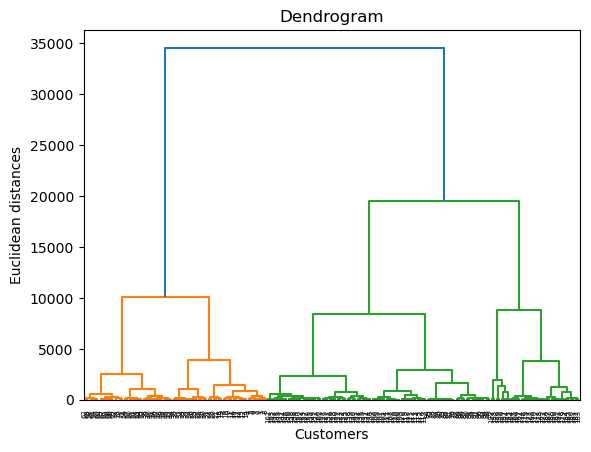

In [289]:
### Using the dendrogram to find the optimal number of clusters

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [300]:
### Training the Hierarchial clustering model on the dataset

hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

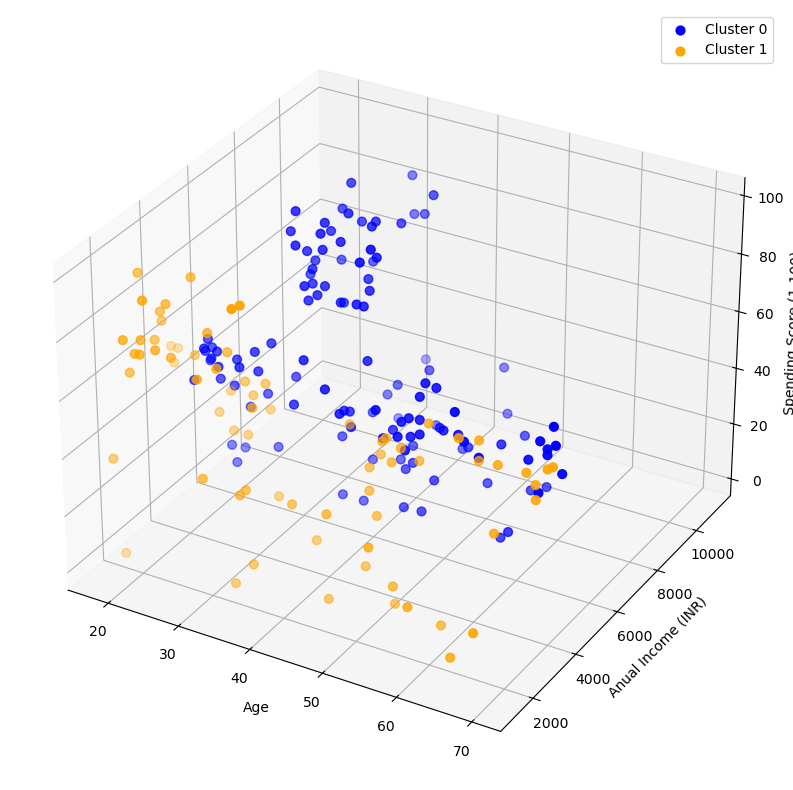

In [305]:
### Visualizing the clusters

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], X[y_hc == 0, 2], s = 40 , color = 'blue', label = "Cluster 0")
ax.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], X[y_hc == 1, 2], s = 40 , color = 'orange', label = "Cluster 1")
# ax.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], X[y_hc == 2, 2], s = 40 , color = 'green', label = "Cluster 2")
ax.set_xlabel('Age')
ax.set_ylabel('Anual Income (INR)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.show()

In [302]:
### Calculating the performance of the clusters

silhouette_score_hc = round(silhouette_score(X, y_hc), 2)
calinski_harabasz_score_hc = round(calinski_harabasz_score(X, y_hc), 2)

print('Silhouette Score : {}'.format(silhouette_score_hc))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_hc))

Silhouette Score : 0.56
Calinski Harabasz Score : 338.43


In [303]:
### Tabulating the results

table = []
print('Segmentation using Age, Annual Income, and Spending Score')
table.append(['S.No', 'Clustering Model', 'Silhouette Score', 'Calinski Harabasz Score'])
table.append([1, 'K - Means clustering', silhouette_score_kmeans, calinski_harabasz_score_kmeans])
table.append([2, 'Hierarchial clustering', silhouette_score_hc, calinski_harabasz_score_hc])
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

Segmentation using Age, Annual Income, and Spending Score
╒════════╤════════════════════════╤════════════════════╤═══════════════════════════╕
│   S.No │ Clustering Model       │   Silhouette Score │   Calinski Harabasz Score │
╞════════╪════════════════════════╪════════════════════╪═══════════════════════════╡
│      1 │ K - Means clustering   │               0.6  │                   1042.53 │
├────────┼────────────────────────┼────────────────────┼───────────────────────────┤
│      2 │ Hierarchial clustering │               0.56 │                    338.43 │
╘════════╧════════════════════════╧════════════════════╧═══════════════════════════╛


## Conclusion